## 120 Years of Olympic History

Exploratory Data Analysis viz. EDA is an essential step for any data science problem. Evidently, just quoting numbers and statistics might be complicated to understand. But visualization elements like charts and maps make it easier for everybody to discover and interpret various characteristics of the data. 

In order to work through the data visualization side of Pandas, we take the historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. 
[ Source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results ] 

Let's find out some key insights for the Games of the Olympiad and inspect if visualization techniques help with providing a clear understanding of the data. 

<b>Importing librariries and Loading the Datasets:</b>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
!ls archive

athlete_events.csv noc_regions.csv


In [5]:
data1 = pd.read_csv("archive/athlete_events.csv")
data2 = pd.read_csv("archive/noc_regions.csv")

<b>Vieweing the tabular data, checking dimension, calculating %age nulls:</b>

In [6]:
data1.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [7]:
data2.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [8]:
data1.shape, data2.shape

((271116, 15), (230, 3))

In [9]:
temp = data1.isna().sum()/271116
temp[temp>0]

Age       0.034944
Height    0.221938
Weight    0.231912
Medal     0.853262
dtype: float64

In [10]:
temp = data2.isna().sum()/230
temp[temp>0]

region    0.013043
notes     0.908696
dtype: float64

In [65]:
data1.nunique().sort_values()

Sex            2
Season         2
Medal          3
Year          35
City          42
Games         51
Sport         66
Age           74
Height        95
Weight       220
NOC          230
Event        765
Team        1184
Name      134732
ID        135571
dtype: int64

In [66]:
data2.nunique().sort_values()

notes      21
region    206
NOC       230
dtype: int64

<b>Number of games in Summer Vs Winter:</b>

In [11]:
(data1['Season'] == "Summer").sum(), (data1['Season'] == "Winter").sum()

(222552, 48564)

<b>Plotting No. of players for every year from 1996 to 2016:</b>

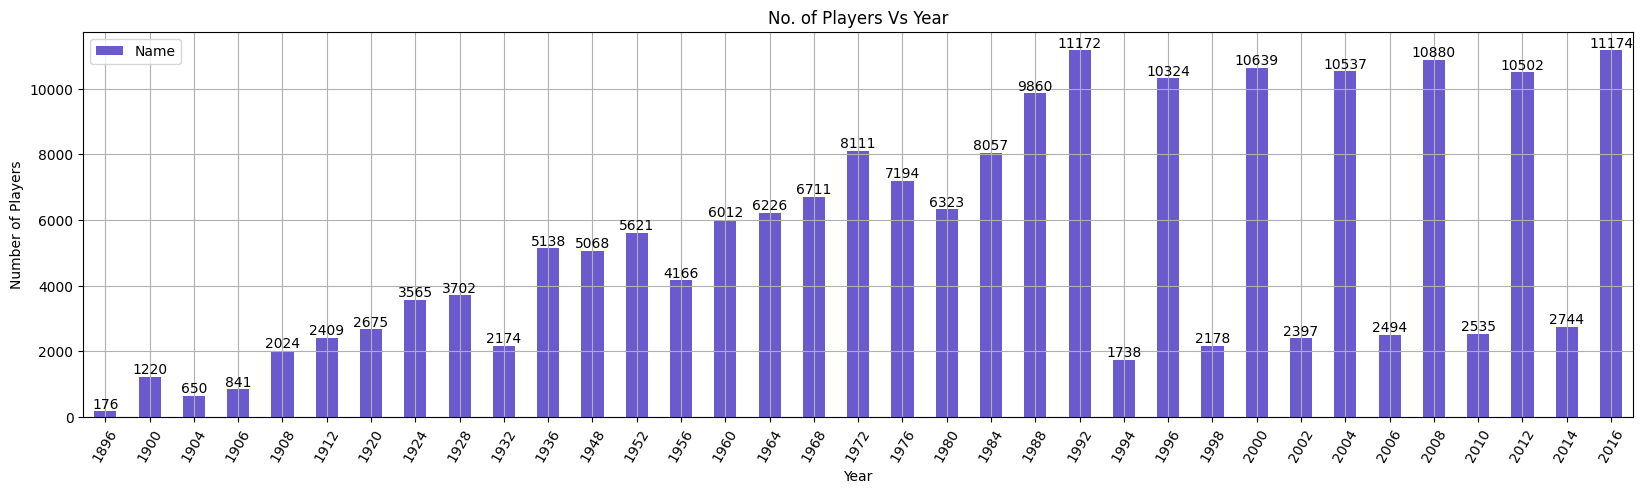

In [12]:
temp = data1[['Name', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize = (20, 5), rot = 60, title = "No. of Players Vs Year", grid = True, 
              ylabel = 'Number of Players', xlabel = 'Year', color = "slateblue")

for container in ax.containers:
    ax.bar_label(container)

We can see the irregular rises and falls in the graph above. That's because up until 1992, Winter and Summer Games were held in the same year. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. 

<b>Looking at the No. of players vs Year & Season:</b>

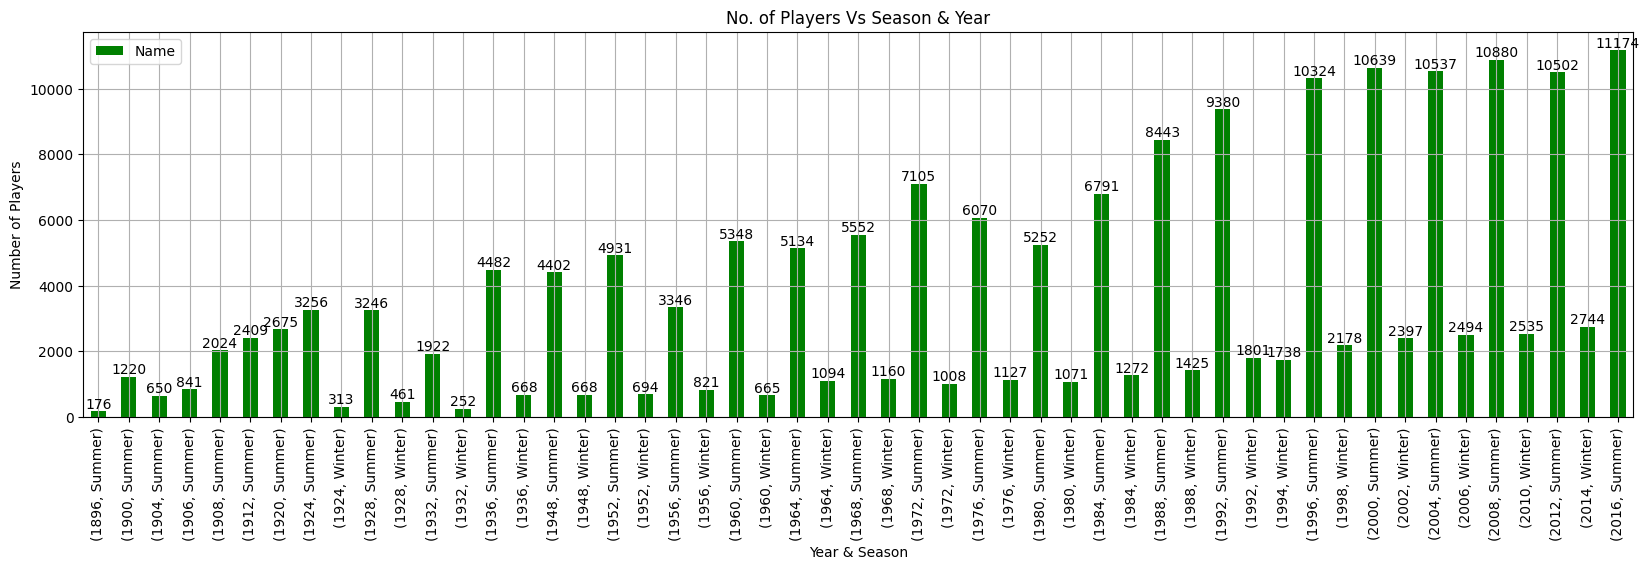

In [13]:
temp = data1[['Name', 'Year', 'Season']].drop_duplicates().groupby(['Year', 'Season']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 90, title = "No. of Players Vs Season & Year", grid = True, 
              ylabel = 'Number of Players', xlabel = 'Year & Season', color = 'green')

for container in ax.containers:
    ax.bar_label(container)

# Could've directly used data1['Games'] here

<b>Separately looking at No. of players Vs Summer and Winter season:</b>

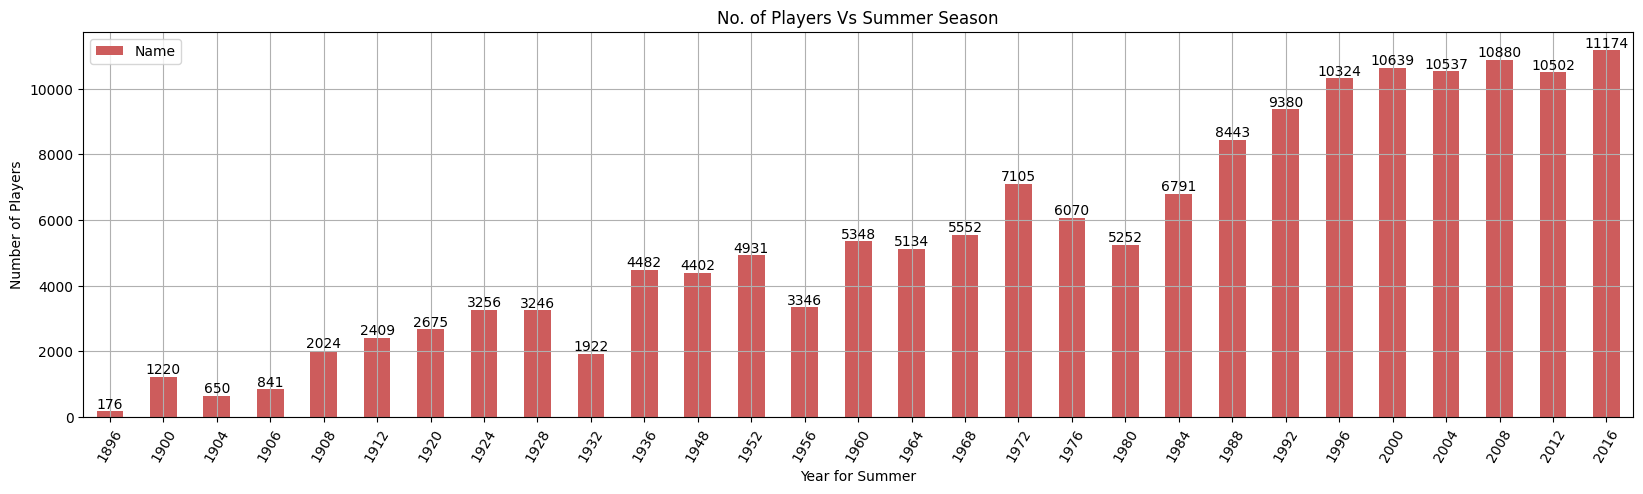

In [14]:
temp = data1[data1.Season == "Summer"][['Name', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 60, title = "No. of Players Vs Summer Season", grid = True, 
          ylabel = 'Number of Players', xlabel = 'Year for Summer', color = 'indianred')
for container in ax.containers:
    ax.bar_label(container)

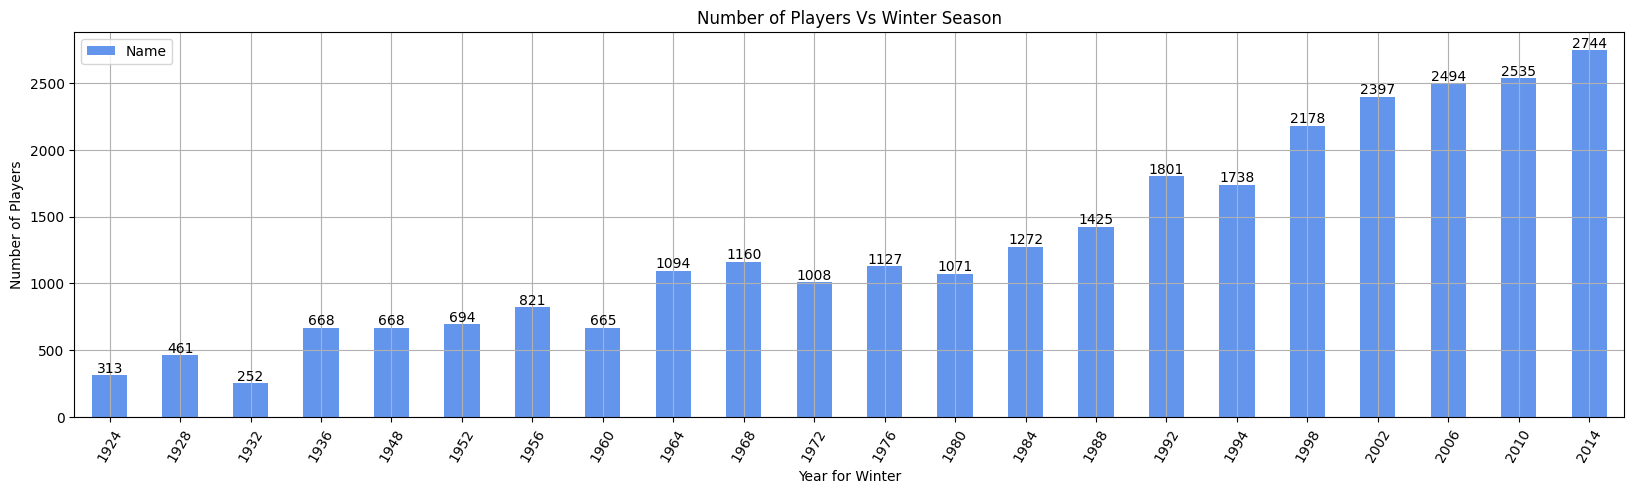

In [15]:
temp = data1[data1.Season == "Winter"][['Name', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 60, title = 'Number of Players Vs Winter Season', grid = True,
              ylabel = 'Number of Players', xlabel = 'Year for Winter', color = 'cornflowerblue' )

for container in ax.containers:
    ax.bar_label(container)

Looking at both the seasons combined reproduced highs and lows since number of players for summer vs winter games was different. But looking at both the seasons separately shows the overall increasing trend of number of players over the years. 

<b>Plotting total number of sports played over the years through Summer and Winter games separately:</b>

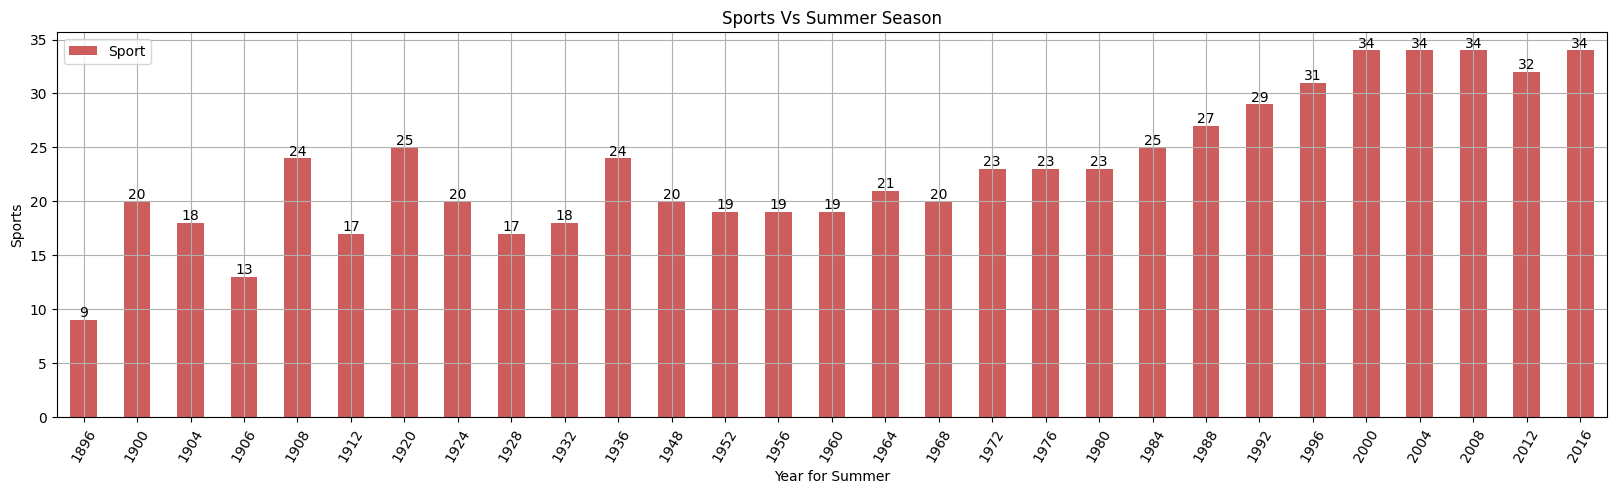

In [16]:
temp = data1[data1.Season == "Summer"][['Sport', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 60, title = "Sports Vs Summer Season", grid = True, 
          ylabel = 'Sports', xlabel = 'Year for Summer', color = 'indianred')
for container in ax.containers:
    ax.bar_label(container)

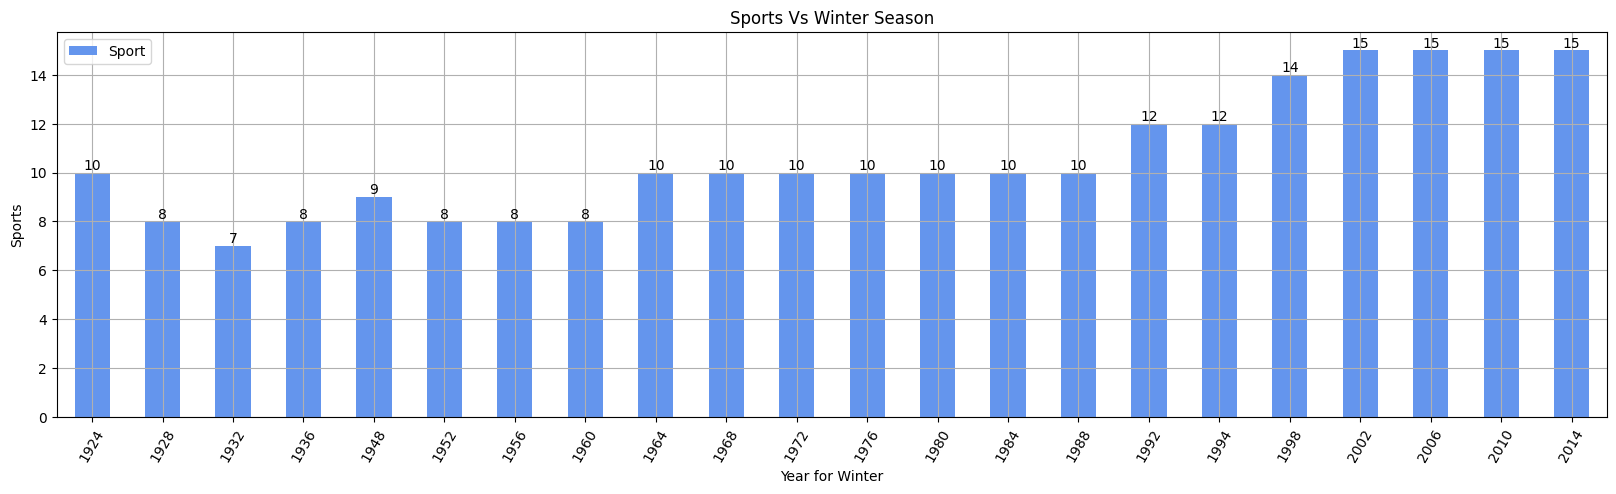

In [17]:
temp = data1[data1.Season == "Winter"][['Sport', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 60, title = "Sports Vs Winter Season", grid = True, 
          ylabel = 'Sports', xlabel = 'Year for Winter', color = 'cornflowerblue')
for container in ax.containers:
    ax.bar_label(container)

<b>Plotting total number of events held over the years through Summer and Winter games separately:</b>

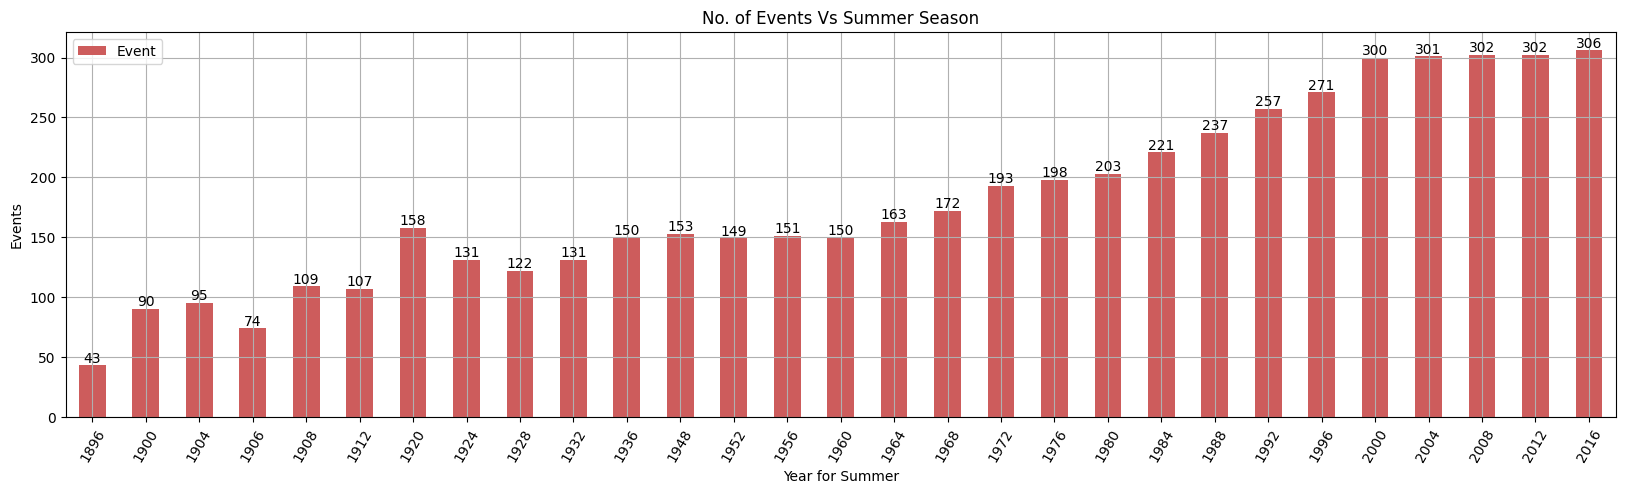

In [18]:
temp = data1[data1.Season == "Summer"][['Event', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 60, title = "No. of Events Vs Summer Season", grid = True, 
          ylabel = 'Events', xlabel = 'Year for Summer', color = 'indianred')
for container in ax.containers:
    ax.bar_label(container)

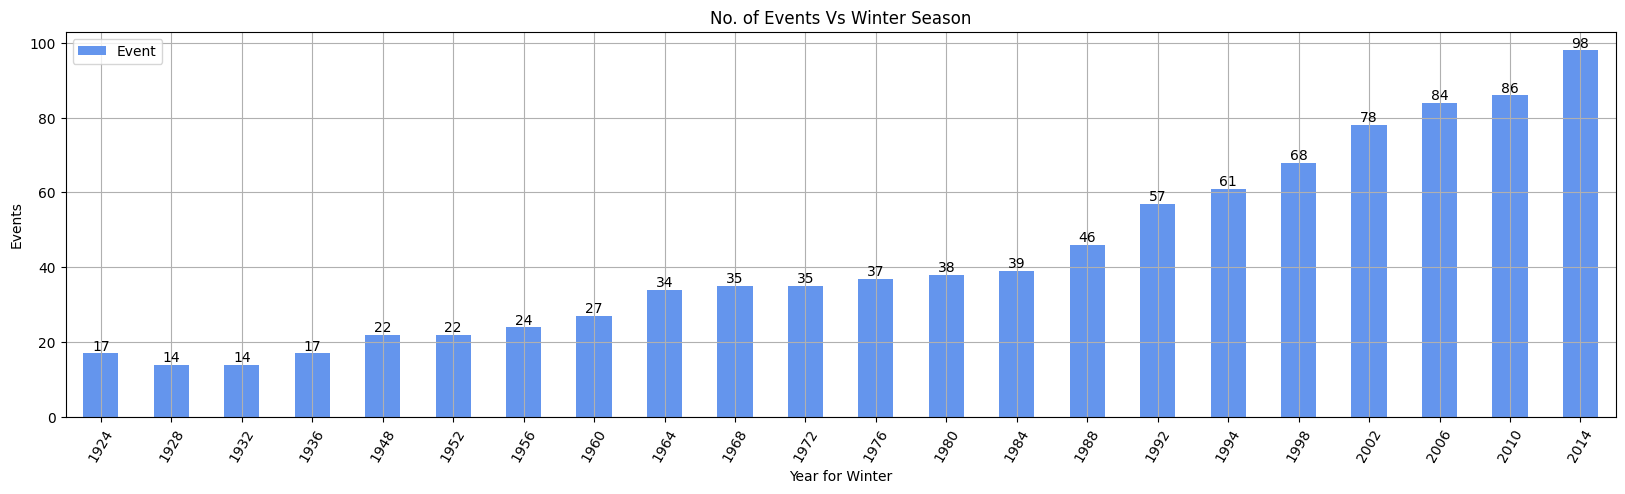

In [19]:
temp = data1[data1.Season == "Winter"][['Event', 'Year']].drop_duplicates().groupby(['Year']).count()
ax = temp.plot(kind = "bar", figsize=(20, 5), rot = 60, title = "No. of Events Vs Winter Season", grid = True, 
          ylabel = 'Events', xlabel = 'Year for Winter', color = 'cornflowerblue')
for container in ax.containers:
    ax.bar_label(container)

<b>Analyzing YoY Change in Number of Players across Years for Summer and Winter Games respectively:</b>

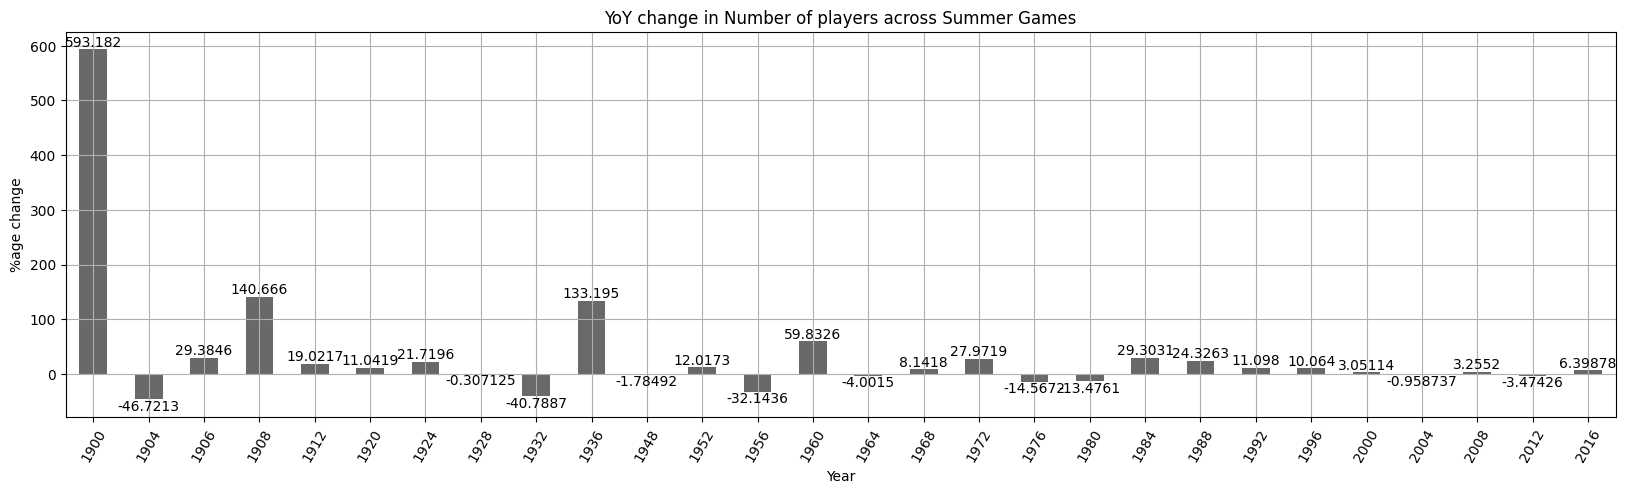

In [60]:
temp1 = data1[data1.Season == "Summer"][['Name', 'Year']].drop_duplicates().groupby(['Year']).count()
temp2 = temp1.diff()

temp3 = temp1.merge(temp2, on = 'Year')
temp3['Name_x'] = temp3['Name_x'].shift(periods = 1)
temp3['YoY'] = 100*temp3['Name_y']/temp3['Name_x']
temp3 = temp3.iloc[1:, :] # dropping the first row -> all NaN

ax = temp3['YoY'].plot(kind = "bar", figsize=(20, 5), rot = 60, 
                       title = "YoY change in Number of players across Summer Games", 
                       grid = True, ylabel = '%age change', xlabel = 'Year', color = 'dimgrey')
for container in ax.containers:
    ax.bar_label(container)

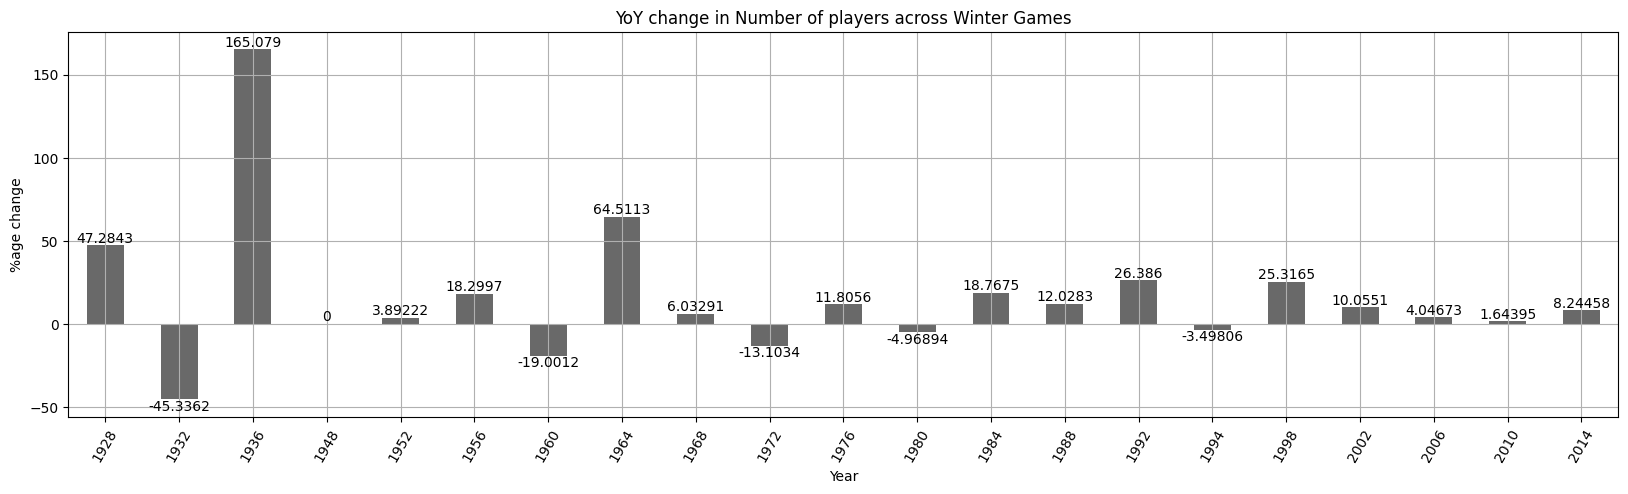

In [57]:
temp1 = data1[data1.Season == "Winter"][['Name', 'Year']].drop_duplicates().groupby(['Year']).count()
temp2 = temp1.diff()

temp3 = temp1.merge(temp2, on = 'Year')
temp3['Name_x'] = temp3['Name_x'].shift(periods = 1)
temp3['YoY'] = 100*temp3['Name_y']/temp3['Name_x']
temp3 = temp3.iloc[1:, :] # dropping the first row -> all NaN

ax = temp3['YoY'].plot(kind = "bar", figsize=(20, 5), rot = 60, 
                       title = "YoY change in Number of players across Winter Games", 
                       grid = True, ylabel = '%age change', xlabel = 'Year', color = 'dimgrey')
for container in ax.containers:
    ax.bar_label(container)

<b>Diving into No. of Events across different Sports over the Years in Summer and Winter Games respectively:</b>

In [64]:
data1['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

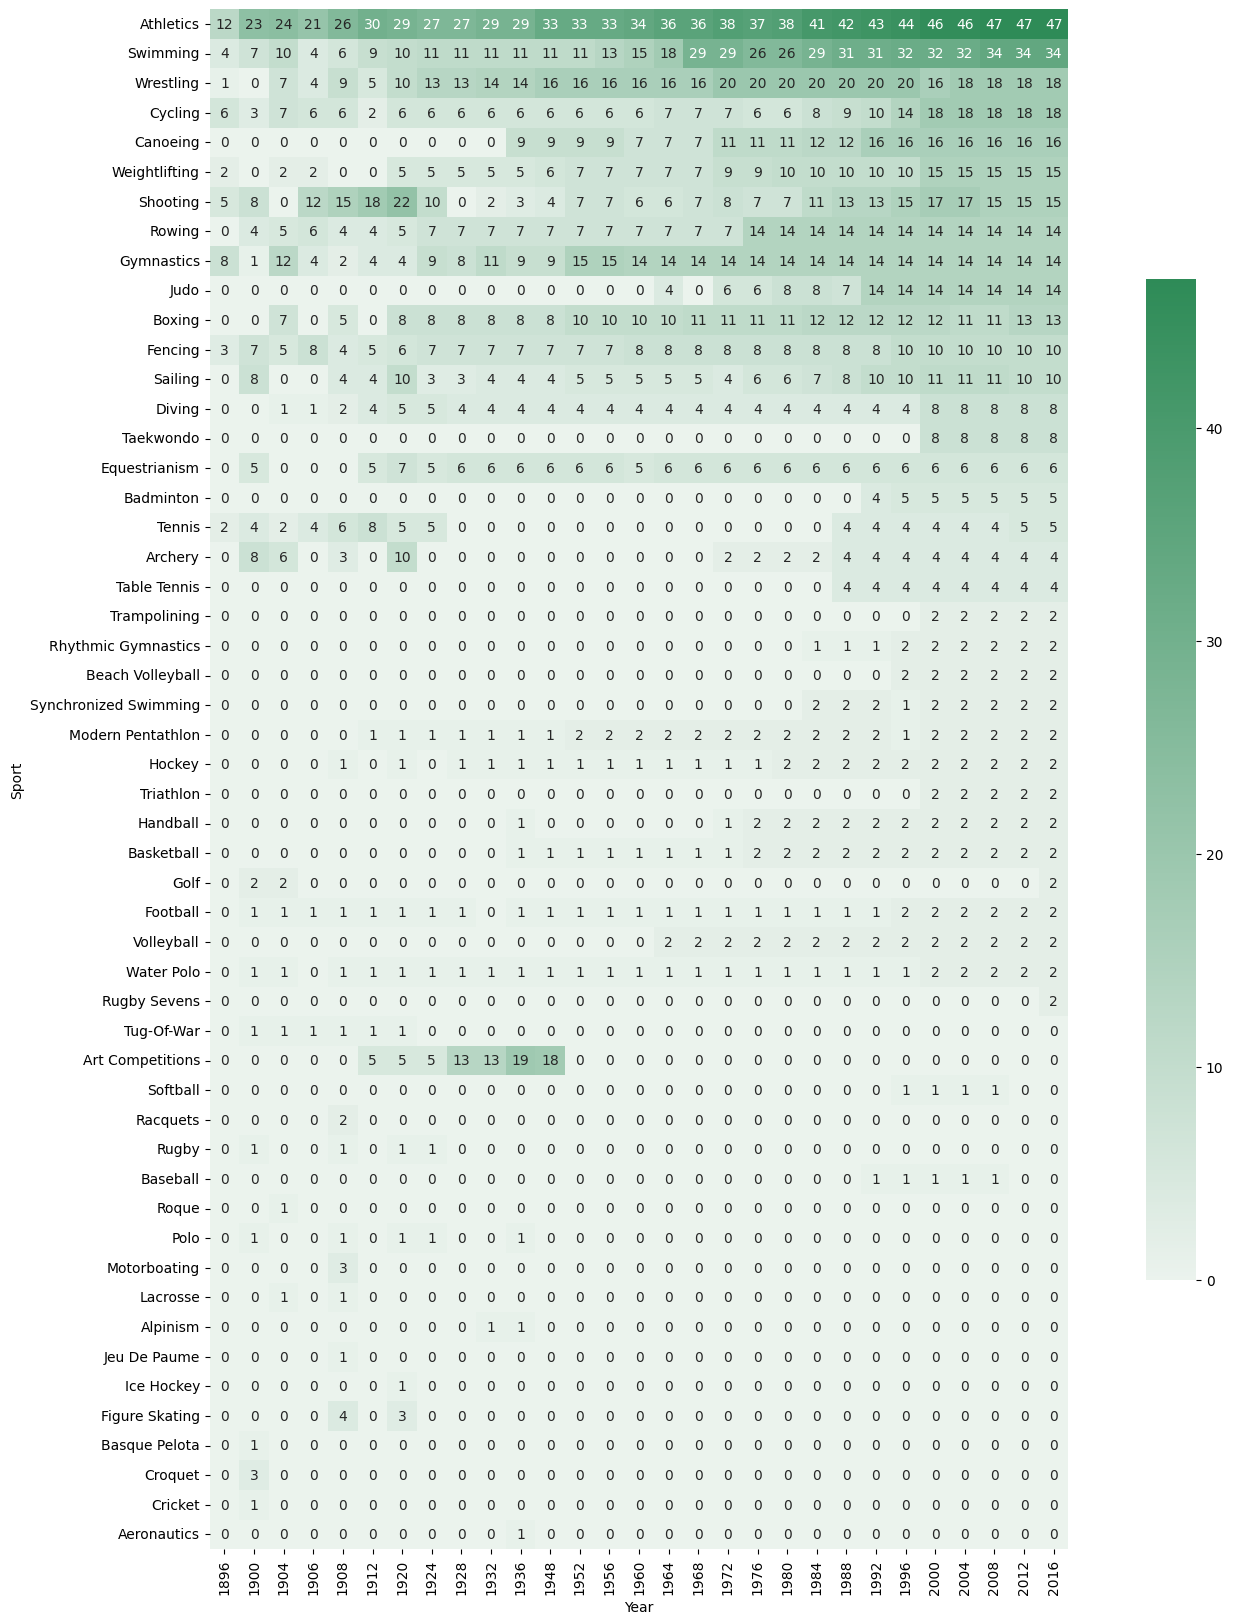

In [133]:
temp1 = data1[data1.Season == "Summer"][['Event', 'Year', 'Sport']].drop_duplicates().groupby(
                                                    ['Year', 'Sport']).count().reset_index(inplace = False)
ct = temp1.pivot(index = 'Sport', columns = 'Year', values = 'Event').fillna(0)
ct = ct.sort_values(by = 2016, ascending = False)

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(ct, cmap=cmap, square=True, cbar_kws={"shrink": .65}, annot=True)
plt.show()

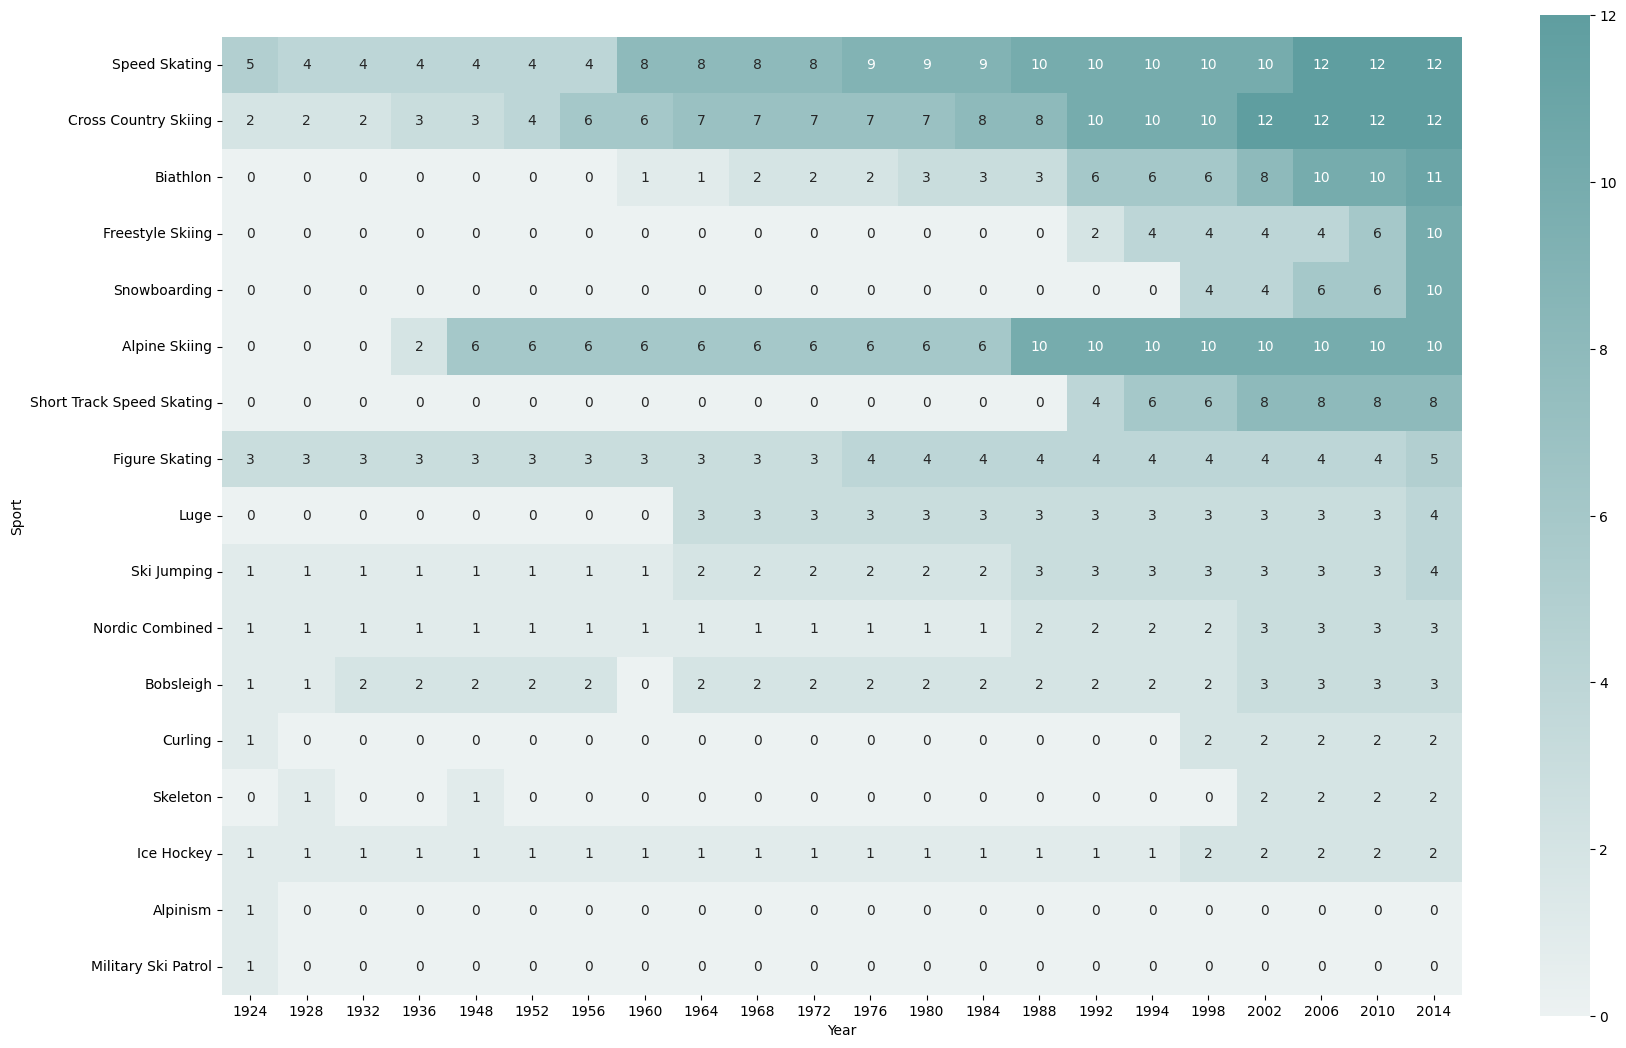

In [135]:
temp1 = data1[data1.Season == "Winter"][['Event', 'Year', 'Sport']].drop_duplicates().groupby(
                                                    ['Year', 'Sport']).count().reset_index(inplace = False)
ct = temp1.pivot(index = 'Sport', columns = 'Year', values = 'Event').fillna(0)
ct = ct.sort_values(by = 2014, ascending = False)

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.light_palette("cadetblue", as_cmap=True)
sns.heatmap(ct, cmap=cmap, square=True, cbar_kws={"shrink": .65}, annot=True)
plt.show()

<b>Look at %Females over the years in Summer and Winter Games respectively: </b>

In [137]:
data1.Sex.value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

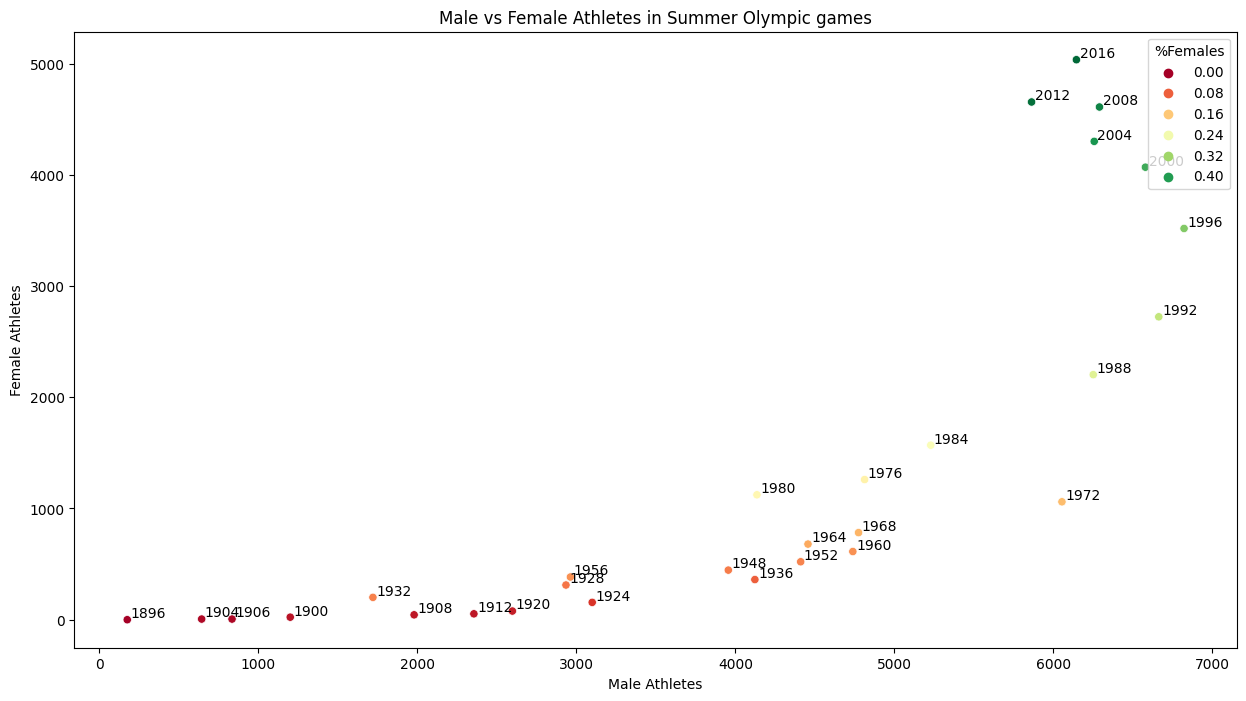

In [192]:
temp = data1[data1.Season == "Summer"][['Sex', 'Year', 'ID']].drop_duplicates().groupby(['Year', 'Sex']
                                                                    ).count().reset_index(inplace = False)
ct = temp.pivot(index = 'Year', columns = 'Sex', values = 'ID').fillna(0).reset_index()
ct['%Females'] = ct['F'] / (ct['F'] + ct['M'])


fig, ax = plt.subplots(figsize=(15, 8))
a = sns.scatterplot(x = "M", y = "F", hue = "%Females", palette='RdYlGn', data=ct, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+20, point['y']+20, '{0:.0f}'.format(point['val']))

label_point(ct['M'], ct['F'], ct['Year'], ax)
        
ax.set_xlabel('Male Athletes')
ax.set_ylabel('Female Athletes')
ax.set_title('Male vs Female Athletes in Summer Olympic games')
plt.show()

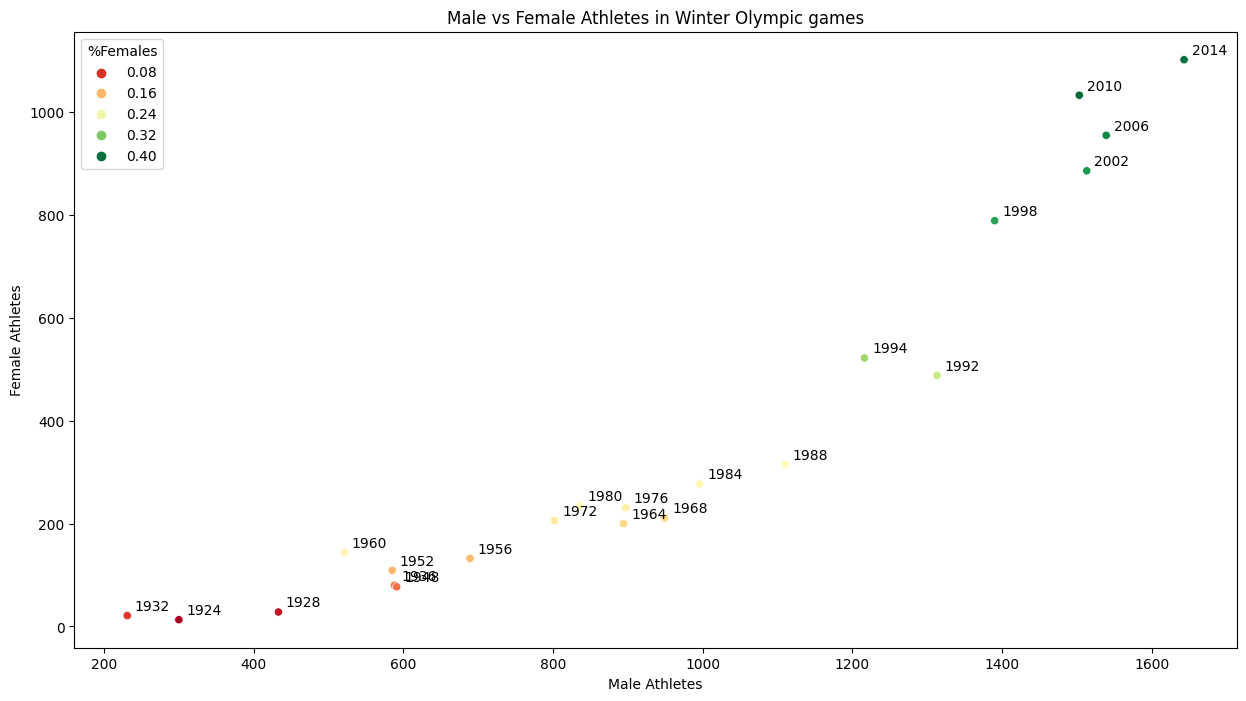

In [193]:
temp = data1[data1.Season == "Winter"][['Sex', 'Year', 'ID']].drop_duplicates().groupby(['Year', 'Sex']
                                                                    ).count().reset_index(inplace = False)
ct = temp.pivot(index = 'Year', columns = 'Sex', values = 'ID').fillna(0).reset_index()
ct['%Females'] = ct['F'] / (ct['F'] + ct['M'])


fig, ax = plt.subplots(figsize=(15, 8))
a = sns.scatterplot(x = "M", y = "F", hue = "%Females", palette='RdYlGn', data=ct, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+10, point['y']+10, '{0:.0f}'.format(point['val']))

label_point(ct['M'], ct['F'], ct['Year'], ax)
        
ax.set_xlabel('Male Athletes')
ax.set_ylabel('Female Athletes')
ax.set_title('Male vs Female Athletes in Winter Olympic games')
plt.show()

<b>Plotting Age Distribution for Summer and Winter Games across time:</b>

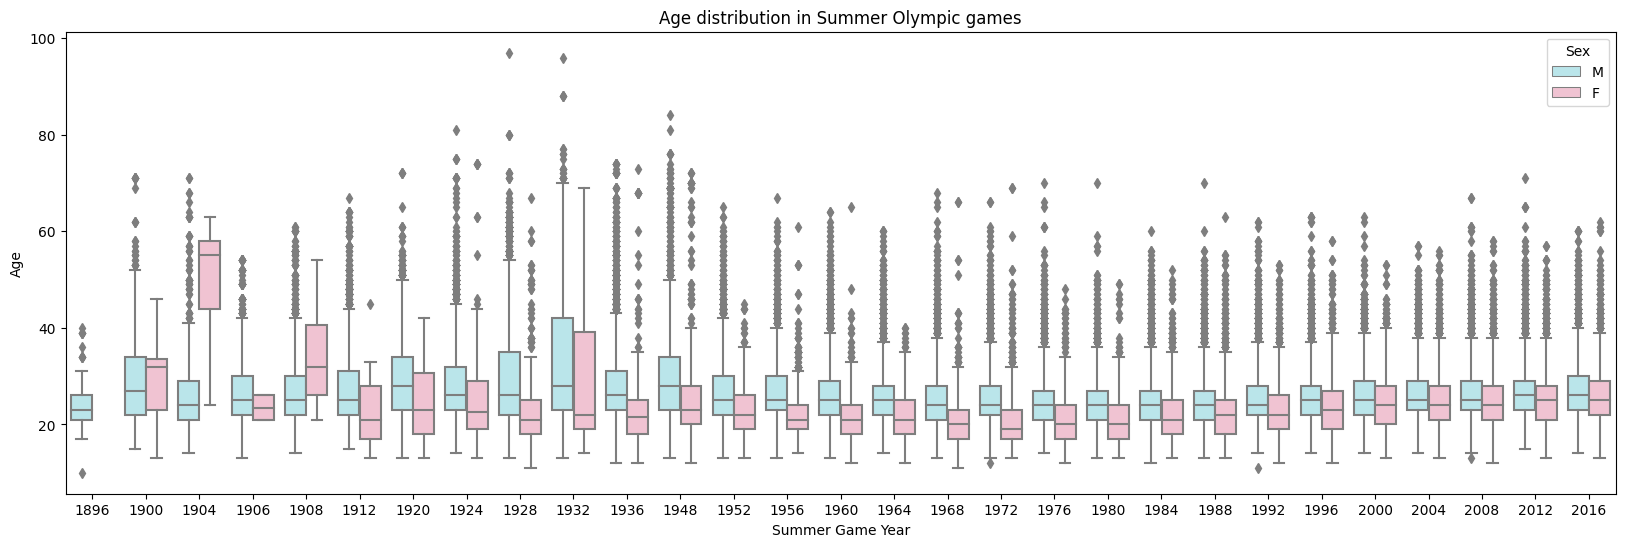

In [194]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x = "Year", y = "Age", hue = "Sex", palette = {"M": "#B2EBF2", "F":"#F8BBD0"}, 
                data = data1[data1['Season'] == 'Summer'], ax = ax)
        
ax.set_xlabel('Summer Game Year')
ax.set_ylabel('Age')
ax.set_title('Age distribution in Summer Olympic games')
plt.show()

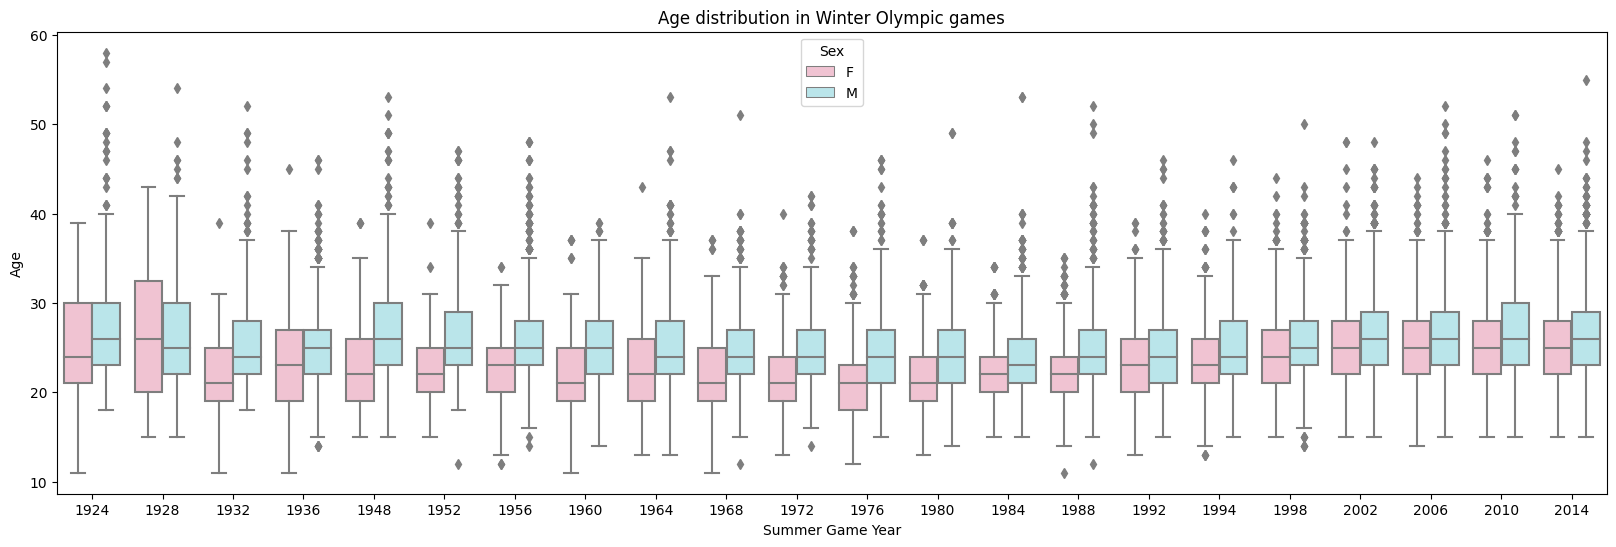

In [195]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x = "Year", y = "Age", hue = "Sex", palette = {"M": "#B2EBF2", "F":"#F8BBD0"}, 
                data = data1[data1['Season'] == 'Winter'], ax = ax)
        
ax.set_xlabel('Summer Game Year')
ax.set_ylabel('Age')
ax.set_title('Age distribution in Winter Olympic games')
plt.show()

<b>Looking at the Total Number of Medals [Gold, Silver, Bronze] over the years for Summer & Winter Games:</b>

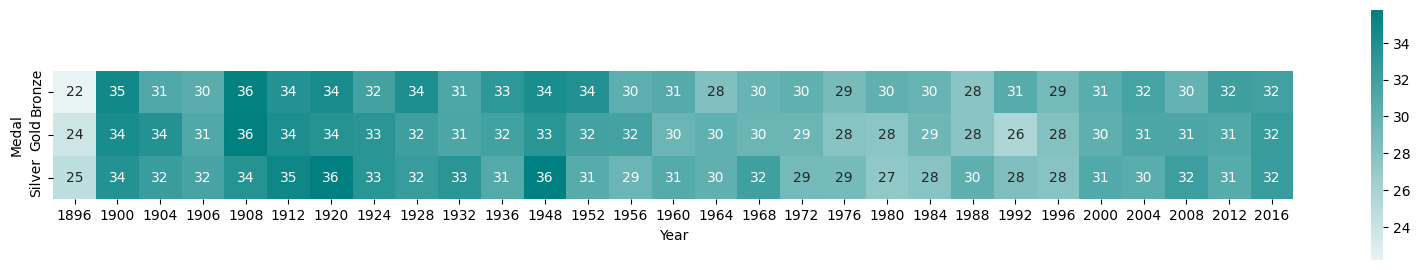

In [241]:
temp = data1[data1.Season == "Summer"][['Age', 'Year', 'Medal']].drop_duplicates().groupby(['Medal', 'Year']
                                                                    ).mean().reset_index()
ct = temp.pivot(index = 'Medal', columns = 'Year', values = 'Age')

f, ax = plt.subplots(figsize=(20, 5))
cmap = sns.light_palette("teal", as_cmap=True)
sns.heatmap(ct, cmap=cmap, square=True, cbar_kws={"shrink": .65}, annot=True)
plt.show()

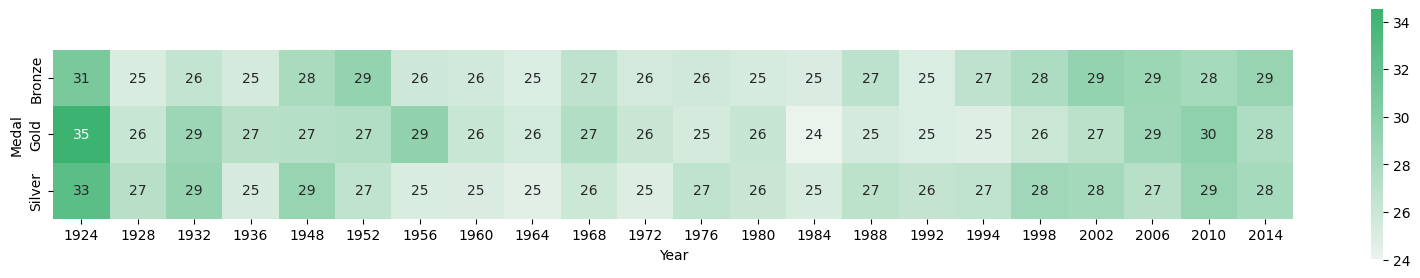

In [248]:
temp = data1[data1.Season == "Winter"][['Age', 'Year', 'Medal']].drop_duplicates().groupby(['Medal', 'Year']
                                                                    ).mean().reset_index()
ct = temp.pivot(index = 'Medal', columns = 'Year', values = 'Age')

f, ax = plt.subplots(figsize=(20, 5))
cmap = sns.light_palette("mediumseagreen", as_cmap=True)
sns.heatmap(ct, cmap=cmap, square=True, cbar_kws={"shrink": .65}, annot=True)
plt.show()

<b>Finding out the regions with highest number of total medals throughout the history of Summer and Winter Games:</b>

In [252]:
data11 = data1.copy()
data11 = data11.merge(data2, how = 'left', on = 'NOC')

<AxesSubplot: title={'center': 'Total Medals by Region'}, xlabel='No. of Medals', ylabel='Region'>

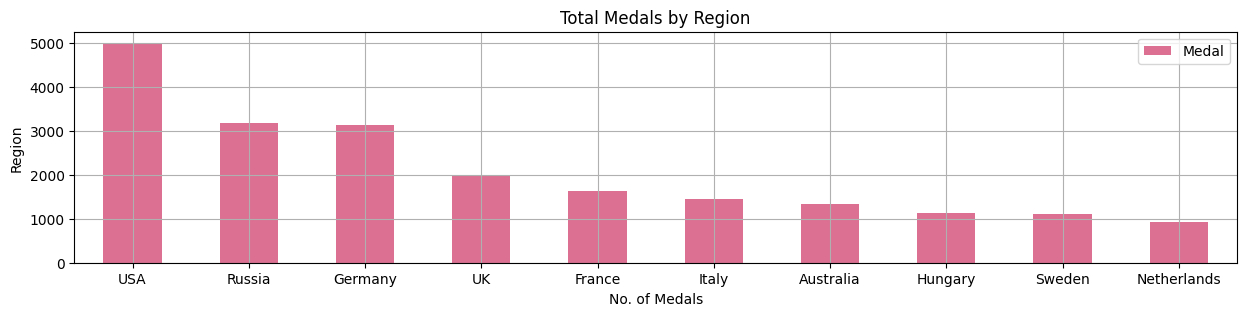

In [298]:
data11[data11.Season == "Summer"][['region', 'Medal']].groupby(['region']).count().sort_values(
                                          by = 'Medal', ascending=False)[:10].plot(
                                            kind = "bar", figsize=(15, 3), rot = 0, 
                                                title = "Total Medals by Region", grid = True, 
                                                  ylabel = 'Region', 
                                                    xlabel = 'No. of Medals', color = 'palevioletred')


<AxesSubplot: title={'center': 'Total Medals by Region'}, xlabel='No. of Medals', ylabel='Region'>

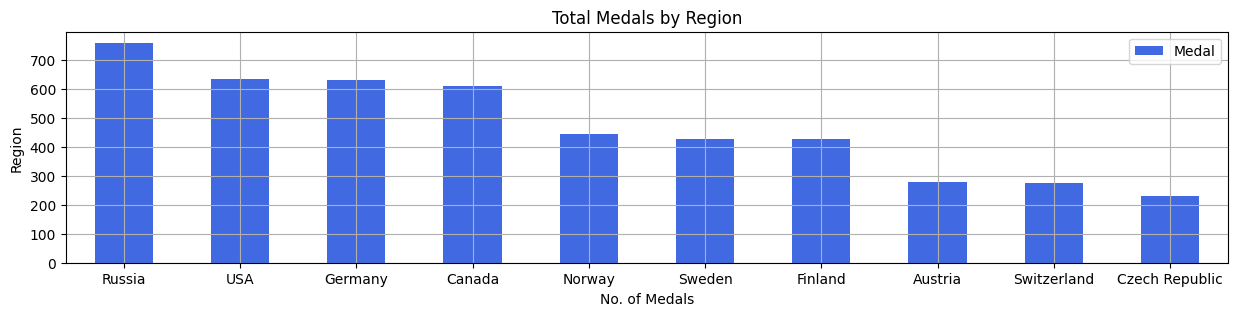

In [299]:
data11[data11.Season == "Winter"][['region', 'Medal']].groupby(['region']).count().sort_values(
                                          by = 'Medal', ascending=False)[:10].plot(
                                            kind = "bar", figsize=(15, 3), rot = 0, 
                                                title = "Total Medals by Region", grid = True, 
                                                  ylabel = 'Region', 
                                                    xlabel = 'No. of Medals', color = 'royalblue')

Indeed, pandas offers some great functionality for plotting charts and visualizing data which I utilized in the exerice above. The graphs make it much easy to interpret the data and spot some clear trends for further analysis. 